#  Loading the MNIST data from tensorflow datasets

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Normalizing the data
Changing the pixel values from 0-255 to 0-1 to reduce extra computation

In [2]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Visualizing the data using Matplotlib

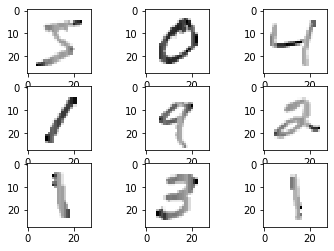

In [4]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(255-X_train[i], cmap='gray')
plt.show()

#  Defining and fitting the model

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2613 - accuracy: 0.9237
Epoch 2/3
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1060 - accuracy: 0.9667
Epoch 3/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0704 - accuracy: 0.9782


#  Checking the Validation Loss and Accuracy

In [6]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#  Making predictions

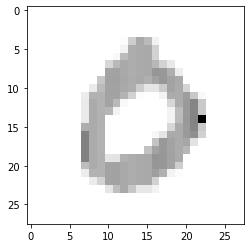

In [7]:
sample = 3

plt.imshow(255-X_test[sample], cmap='gray')
plt.show()

In [8]:
import numpy as np
predictions = model.predict([X_test])
print(np.argmax(predictions[sample]))

0


In [9]:
model.save("Model.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Model.model\assets
